# This Jupyter Notebook Generates metadata template to perform coverage inference on:

1. Combine metadata, predictions, and substrate data into a single DataFrame.
2. Perform initial data cleaning and validation on the combined DataFrame.
3. Plot histograms of SCALAR values for different camera systems.
4. Copy images to bin folders based on SCALAR values for inference.
5. Perform inference using Segformer_Coverage_INFER_RF.py.
6. Combine metadata after inference.
7. Merge inference results with the original metadata.
8. Map reef codes to reef names.
9. Save the final combined DataFrame to a CSV file.
10. Display unique reef names in the final DataFrame.

In [1]:
import matplotlib.pyplot as plt
import sys
# Add the path to the mussel_finder module
sys.path.append("../MusselFinder")

from scalar import *
import inference as inference
Ymmdd = Utils.return_YMD()
Ymmdd

c:\Users\ageglio\AppData\Local\miniforge3\envs\mussel-finder\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'20250527'

## Reef Overlap Inference Update 2024

In [2]:
meta_csv_pths = [
            r"Z:\__AdvancedTechnologyBackup\01_DerivedProducts\CollectMetadata\every1\20240305_001_Iver3069_ABS2\Primary_Image_Metadata.csv",
            r"Z:\__AdvancedTechnologyBackup\01_DerivedProducts\CollectMetadata\every1\20240305_002_Iver3069_ABS2\Primary_Image_Metadata.csv",
            r"Z:\__AdvancedTechnologyBackup\01_DerivedProducts\CollectMetadata\every1\20240306_001_Iver3069_ABS2\Primary_Image_Metadata.csv",
            r"Z:\__AdvancedTechnologyBackup\01_DerivedProducts\CollectMetadata\every1\20240307_001_Iver3069_ABS2\Primary_Image_Metadata.csv",
]
img_folder_pths = [
            r"Z:\__Organized_Directories_InProgress\2024_UnpackedCollects\Every1\20240305_001_Iver3069_ABS2\PrimaryImages",
              r"Z:\__Organized_Directories_InProgress\2024_UnpackedCollects\Every1\20240305_002_Iver3069_ABS2\PrimaryImages",
              r"Z:\__Organized_Directories_InProgress\2024_UnpackedCollects\Every1\20240306_001_Iver3069_ABS2\PrimaryImages",
              r"Z:\__Organized_Directories_InProgress\2024_UnpackedCollects\Every1\20240307_001_Iver3069_ABS2\PrimaryImages",
]

substrate_path = r"Z:\__AdvancedTechnologyBackup\03_InferenceResults\Substrate\20250523_combined_substrate_predictions.pkl"
OP_table_path = r"Z:\__AdvancedTechnologyBackup\01_DerivedProducts\Database\OP_TABLE.xlsx"

ckpt_dir = r"G:\musselfinder-CheckPoints\exp-b (Elk Rapids)-20240806T153527Z-001\exp-b (Elk Rapids)\pretrained\segformer_b3_dot1_512px\checkpoint-4062"
dest_dir = r"Z:\__AdvancedTechnologyBackup\03_InferenceResults\MusselFinder\March2024"

In [3]:
# Combine metadata and image paths into a single DataFrame
# Create an instance of CalculateScalar with lists for meta_csv_pths and img_folder_pths
calc = CalculateScalar(
    img_folder_pths=img_folder_pths,
    meta_csv_pths=meta_csv_pths,
    substrate_path=substrate_path,
    OP_table_path=OP_table_path
)

scalar_inference_df = calc.scalar_inference_metadata(
    desired_PS_mm=0.425
)
# # Print or save the result
scalar_inference_df.head()

substrate images pred (626334, 2)
metadata csv (53140, 148)
final (53140, 151)


,Filename,SURVEY123_NAME,LAKE,imw,imh,Time_s,Latitude,Longitude,DepthFromSurface_m,DistanceToBottom_m,...,REEF,Year,Month,Day,Time,ImageArea_m2,PS_mm,desired_PS_mm,SCALAR,substrate_class_2c
0,PI_1709658514_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021512,-85.780798,6.209466,2.998623,...,NaN,2024,03,05,12:08:34,3.759015,0.550939,0.425,1.296326,fine
1,PI_1709658515_168_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021512,-85.780802,6.228863,2.955568,...,NaN,2024,03,05,12:08:35,3.651844,0.543028,0.425,1.277713,fine
2,PI_1709658515_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021511,-85.780807,6.258798,2.940601,...,NaN,2024,03,05,12:08:35,3.614951,0.540278,0.425,1.271243,fine
3,PI_1709658516_168_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021511,-85.780812,6.284368,2.927088,...,NaN,2024,03,05,12:08:36,3.581804,0.537795,0.425,1.265401,fine
4,PI_1709658516_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021510,-85.780816,6.299342,2.917106,...,NaN,2024,03,05,12:08:36,3.557415,0.535961,0.425,1.261086,fine


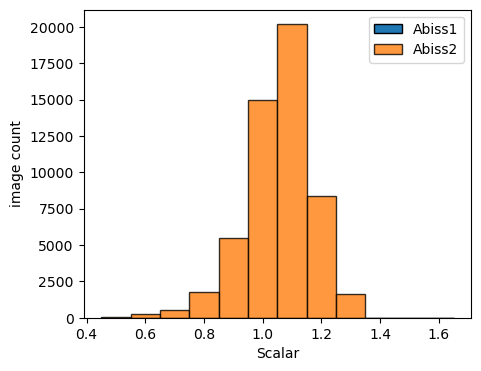

In [4]:
bins_ = [0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65]
df1 = scalar_inference_df[scalar_inference_df.imh == 2176]
df2 = scalar_inference_df[scalar_inference_df.imh == 3000]

fig, ax = plt.subplots(figsize=(5,4))
df1.SCALAR.hist(bins = bins_, edgecolor="k", grid=False, label="Abiss1", ax=ax)
df2.SCALAR.hist(bins = bins_, edgecolor="k", grid=False, label="Abiss2", ax=ax, alpha=0.8)
ax.set_ylabel("image count")
ax.set_xlabel("Scalar")
ax.legend()
plt.show()

## Copy images to bin folders to apply inference to

In [5]:
# copy_scalar_bins(musselfinder_inference, cam_sys = "Abiss1")
# Utils.copy_scalar_bins(musselfinder_inference, dest = r"G:\March2024")

In [6]:
## Scalar 0.9

# sys.argv = [
#     "inference.py",
#     "--image_dir", r"G:\March2024\Abiss2\Scalar0.85_0.95",
#     "--scalar", "0.9",
#     "--output_dir", dest_dir,
#     "--plot",
#     "--plot_every", "100"
# ]
# inference.main()

In [7]:
## Scalar 1.0

# sys.argv = [
#     "inference.py",
#     "--image_dir", r"G:\March2024\Abiss2\Scalar0.95_1.05",
#     "--scalar", "1.0",
#     "--output_dir", dest_dir,
#     "--plot",
#     "--plot_every", "100",
#     "--resume"
# ]
# inference.main()

In [8]:
## Scalar 1.1

# sys.argv = [
#     "inference.py",
#     "--image_dir", r"G:\March2024\Abiss2\Scalar1.05_1.15",
#     "--scalar", "1.1",
#     "--output_dir", dest_dir,
#     "--plot",
#     "--plot_every", "100",
#     "--divide", "2",
#     "--batch_size", "1",
#     "--resume"
# ]
# inference.main()

In [9]:
## Scalar 1.2

# sys.argv = [
#     "inference.py",
#     "--ckpt_dir", ckpt_dir,
#     "--image_dir", r"G:\March2024\Abiss2\Scalar1.15_1.25",
#     "--scalar", "1.2",
#     "--output_dir", dest_dir,
#     "--plot",
#     "--plot_every", "100",
#     "--divide", "2",
#     "--batch_size", "1",
#     "--resume"
# ]
# inference.main()

In [10]:
## Scalar 1.3

# sys.argv = [
#     "inference.py",
#     "--ckpt_dir", ckpt_dir,
#     "--image_dir", r"G:\March2024\Abiss2\Scalar1.25_1.35",
#     "--scalar", "1.3",
#     "--output_dir", dest_dir,
#     "--plot",
#     "--plot_every", "100",
#     "--divide", "2",
#     "--batch_size", "1",
#     "--resume"
# ]
# inference.main()

## Combine

In [12]:
## Final outputs 
metadata_outputs_df =  Utils().combine_inference_metadata(dest_dir, scalar_inference_df)

assert len(metadata_outputs_df) == len(scalar_inference_df), "Metadata outputs do not match scalar inference DataFrame length."
metadata_outputs_df.to_csv(os.path.join(dest_dir, f"MusselFinder_MarchCollects_Infer_{Ymmdd}.csv")) 
metadata_outputs_df



,Filename,SURVEY123_NAME,LAKE,imw,imh,Time_s,Latitude,Longitude,DepthFromSurface_m,DistanceToBottom_m,...,ImageArea_m2,PS_mm,desired_PS_mm,SCALAR,substrate_class_2c,Coverage,infer_imh,infer_imw,infer_scalar,n_tiles
0,PI_1709658514_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021512,-85.780798,6.209466,2.998623,...,3.759015,0.550939,0.425,1.296326,fine,0.004952,3900,5324,1.3,4
1,PI_1709658515_168_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021512,-85.780802,6.228863,2.955568,...,3.651844,0.543028,0.425,1.277713,fine,0.005454,3900,5324,1.3,4
2,PI_1709658515_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021511,-85.780807,6.258798,2.940601,...,3.614951,0.540278,0.425,1.271243,fine,0.005626,3900,5324,1.3,4
3,PI_1709658516_168_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021511,-85.780812,6.284368,2.927088,...,3.581804,0.537795,0.425,1.265401,fine,0.006249,3900,5324,1.3,4
4,PI_1709658516_668_Iver3069,Leland Roll Test,2,4096,3000,1.709659e+09,45.021510,-85.780816,6.299342,2.917106,...,3.557415,0.535961,0.425,1.261086,fine,0.005856,3900,5324,1.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53135,PI_1709833103_571_Iver3069,Mussel Control 1C,2,4096,3000,1.709833e+09,44.987849,-85.810108,3.259194,2.344522,...,2.297942,0.430760,0.425,1.013554,coarse,0.018094,3000,4096,1.0,1
53136,PI_1709833104_072_Iver3069,Mussel Control 1C,2,4096,3000,1.709833e+09,44.987845,-85.810107,3.131767,2.458038,...,2.525849,0.451617,0.425,1.062627,coarse,0.007032,3300,4505,1.1,4
53137,PI_1709833104_572_Iver3069,Mussel Control 1C,2,4096,3000,1.709833e+09,44.987841,-85.810107,2.982098,2.567795,...,2.756455,0.471782,0.425,1.110076,coarse,0.013401,3300,4505,1.1,4
53138,PI_1709833105_072_Iver3069,Mussel Control 1C,2,4096,3000,1.709833e+09,44.987838,-85.810107,2.812374,2.703868,...,3.056337,0.496783,0.425,1.168902,coarse,0.002114,3600,4915,1.2,4
